##  Mini Project: Breast Cancer predictor using Desicion Tree

### Problem Statement:

Use machine learning to predict whether a breast tumor is malignant or benign, analyzing various factors such as tumor size, texture, and other diagnostic features provided in the dataset. The goal is to identify patterns that can assist in early detection and improve diagnostic accuracy.

### Data Collection:

Use the Kaggle Breast Cancer predictor predicto which contains. Download if from Kaggle.

##### https://www.kaggle.com/datasets/yasserh/breast-cancer-dataset

import pandas as pd
import numpy as np

In [3]:
data = pd.read_csv(r"C:\Users\Kavya Venkatesh\Downloads\archive (11)\breast-cancer.csv")

In [4]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [5]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
data.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [7]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [9]:
data.isnull()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
565,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
566,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
567,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [10]:
data.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
564    False
565    False
566    False
567    False
568    False
Length: 569, dtype: bool

In [12]:
data.duplicated().sum()

0

In [13]:
data.ndim

2

In [14]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

## Data Visualization

### Matplotlib

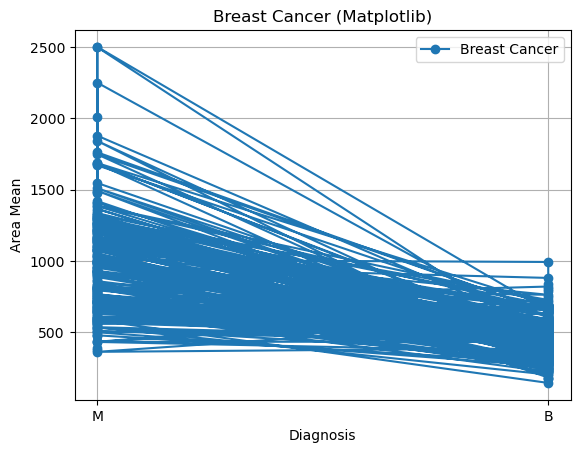

In [15]:
import matplotlib.pyplot as plt

plt.plot(data['diagnosis'], data['area_mean'], marker='o', label='Breast Cancer')
plt.xlabel('Diagnosis')
plt.ylabel('Area Mean')
plt.title('Breast Cancer (Matplotlib)')
plt.legend()
plt.grid()
plt.show()

### Bar Chart

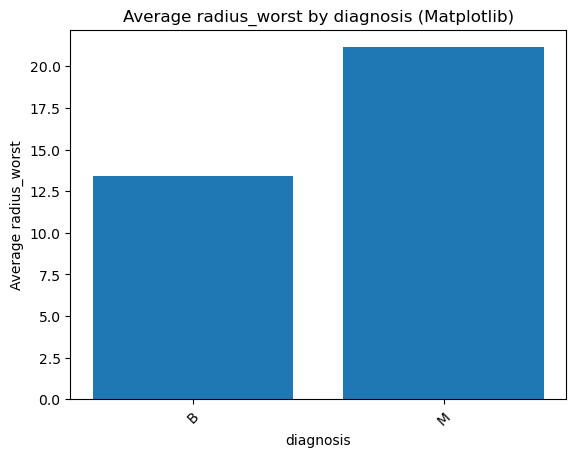

In [16]:
avg_radius_worst = data.groupby('diagnosis')['radius_worst'].mean()
plt.bar(avg_radius_worst.index, avg_radius_worst)
plt.xlabel('diagnosis')
plt.ylabel('Average radius_worst')
plt.title('Average radius_worst by diagnosis (Matplotlib)')
plt.xticks(rotation=45)
plt.show()

### Scatter Plot

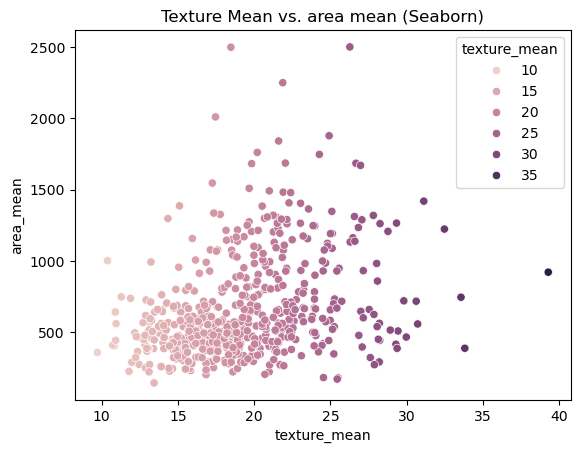

In [19]:
import seaborn as sns

sns.scatterplot(x='texture_mean', y='area_mean', hue='texture_mean', data=data)
plt.title('Texture Mean vs. area mean (Seaborn)')
plt.show()

### HeatMap

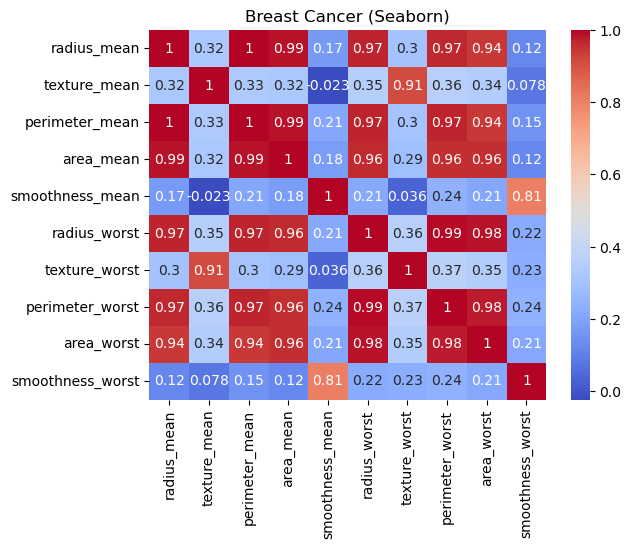

In [20]:
correlation_matrix = data[[	'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 
                           'radius_worst', 'texture_worst',	'perimeter_worst', 'area_worst', 'smoothness_worst']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Breast Cancer (Seaborn)')
plt.show()

### Plotly Visualization

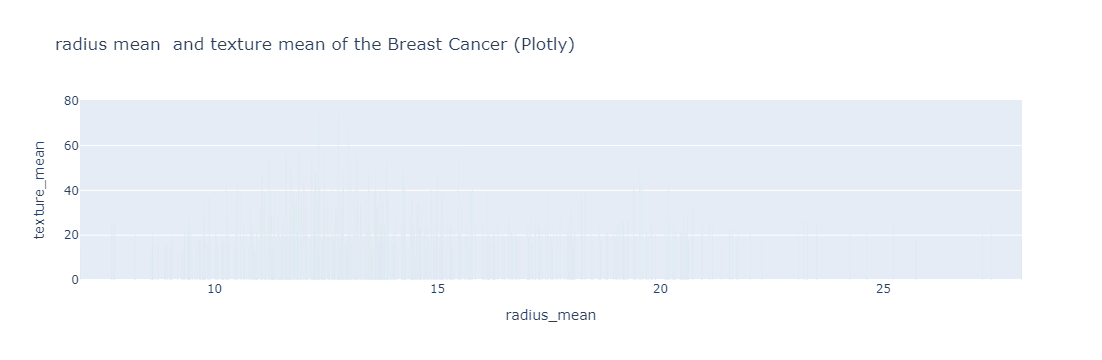

In [25]:
import plotly.express as px
fig = px.bar(data, x='radius_mean', y='texture_mean', 
             title='radius mean  and texture mean of the Breast Cancer (Plotly)', barmode='group')
fig.update_traces(marker_color='green') 
fig.show()

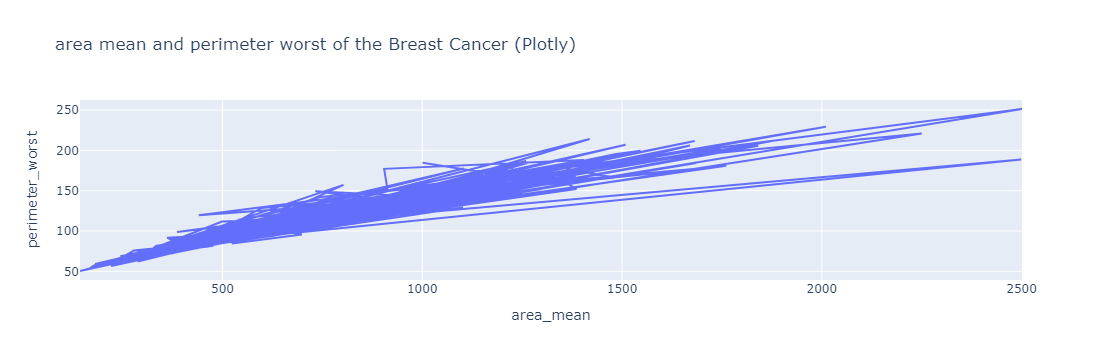

In [28]:
fig = px.line(data, x='area_mean', y='perimeter_worst', title='area mean and perimeter worst of the Breast Cancer (Plotly)')
fig.show()

### Histogram

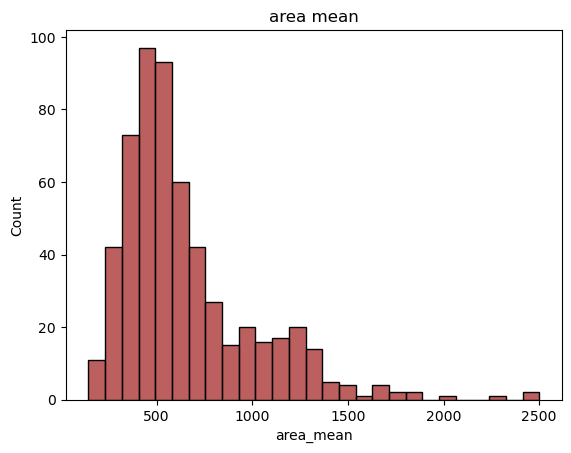

In [29]:
#histogram
sns.histplot(data["area_mean"], color="brown")
plt.title("area mean")
plt.show()

### Box Plot

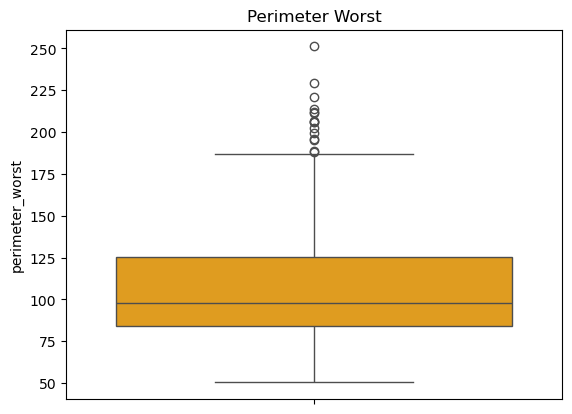

In [30]:
#boxplot
sns.boxplot(y=data["perimeter_worst"], color="orange")
plt.title("Perimeter Worst")
plt.show()

### Line Plot

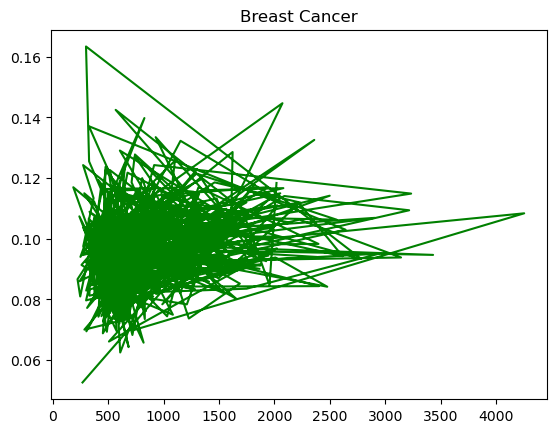

In [31]:
#lineplot
plt.plot(data["area_worst"], data["smoothness_mean"], color="green")
plt.title("Breast Cancer")
plt.show()

### Box Plot

C:\Users\Kavya Venkatesh\AppData\Local\Temp\ipykernel_6880\2181643614.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Axes: xlabel='texture_worst', ylabel='smoothness_mean'>

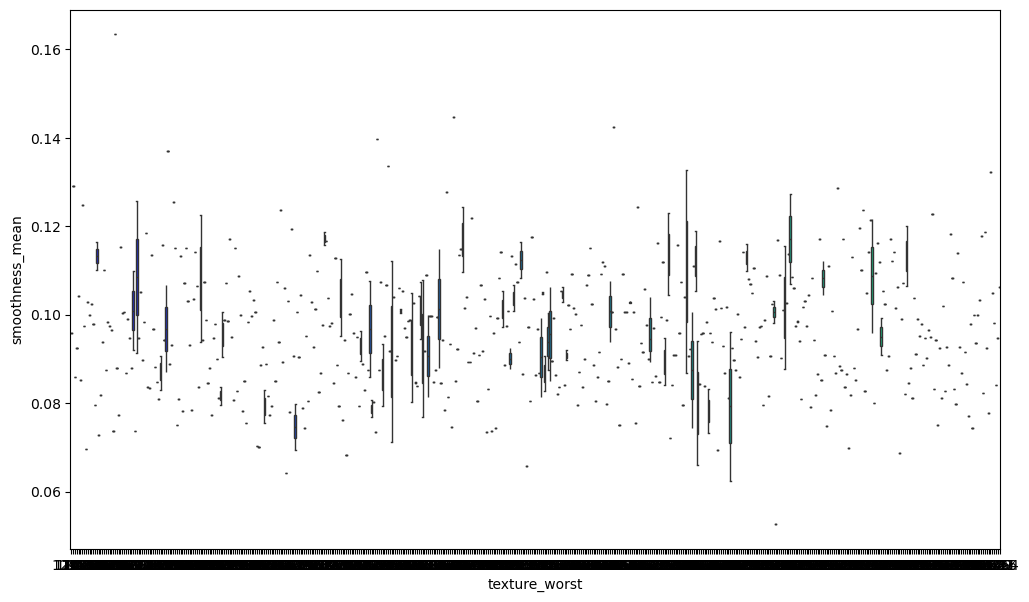

In [33]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='texture_worst',y='smoothness_mean',data=data,palette='winter')

### Pair Plot

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


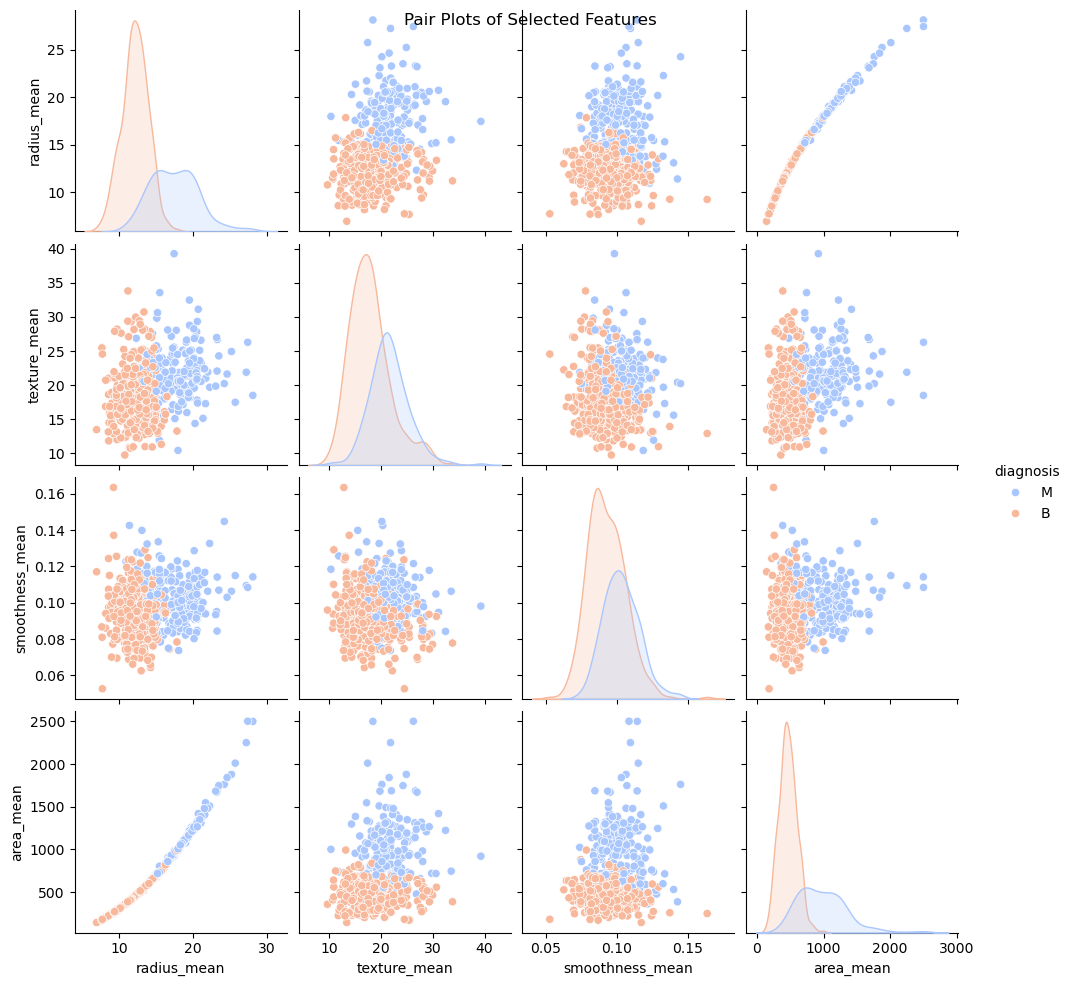

In [64]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"C:\Users\Kavya Venkatesh\Downloads\archive (11)\breast-cancer.csv")  

print(data.columns)

sns.pairplot(data, vars=['radius_mean', 'texture_mean', 'smoothness_mean', 'area_mean'], hue='diagnosis', palette='coolwarm')

plt.suptitle('Pair Plots of Selected Features')  
plt.show()


### Violin Plot

C:\Users\Kavya Venkatesh\AppData\Local\Temp\ipykernel_6880\3055212135.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




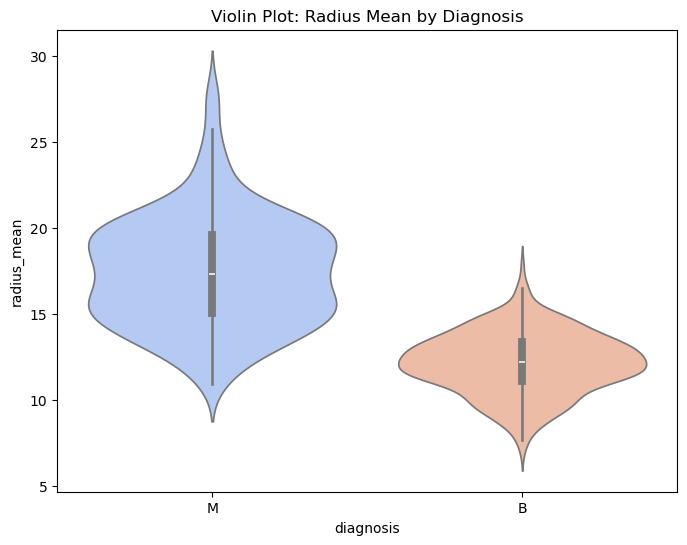

In [65]:
plt.figure(figsize=(8, 6))
sns.violinplot(data=data, x='diagnosis', y='radius_mean', palette='coolwarm')
plt.title('Violin Plot: Radius Mean by Diagnosis')
plt.show()


### Bubble Chart

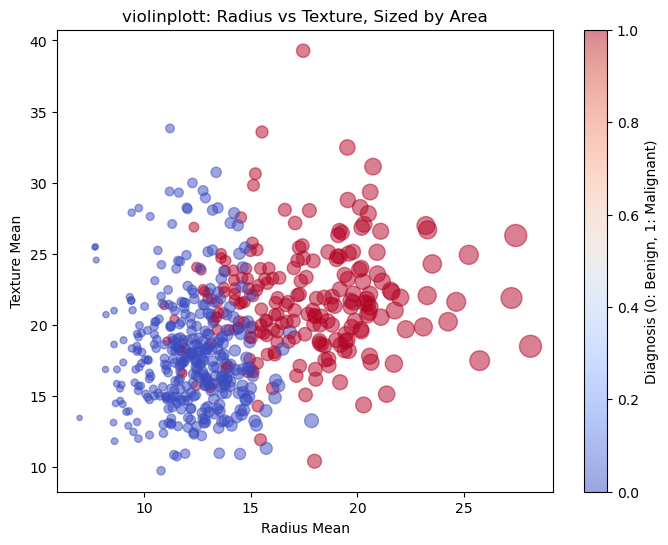

In [71]:
plt.figure(figsize=(8, 6))
plt.scatter(data['radius_mean'], data['texture_mean'], s=data['area_mean'] / 10, alpha=0.5, c=data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0), cmap='coolwarm')
plt.title('Bubble Chart: Radius vs Texture, Sized by Area')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.colorbar(label='Diagnosis (0: Benign, 1: Malignant)')
plt.show()


### Parallel Coordinates Plot

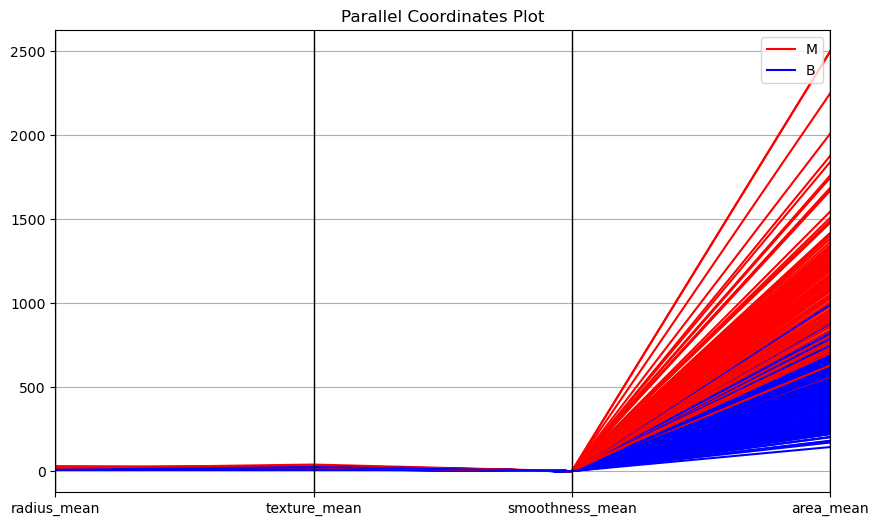

In [70]:
from pandas.plotting import parallel_coordinates

subset = data[['diagnosis', 'radius_mean', 'texture_mean', 'smoothness_mean', 'area_mean']]
plt.figure(figsize=(10, 6))
parallel_coordinates(subset, class_column='diagnosis', color=['red', 'blue'])
plt.title('Parallel Coordinates Plot')
plt.show()


### Density Plot

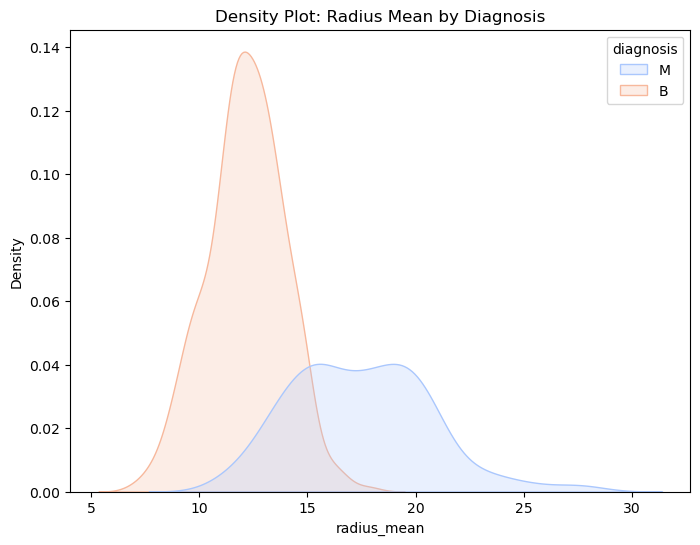

In [73]:
plt.figure(figsize=(8, 6))
sns.kdeplot(data=data, x='radius_mean', hue='diagnosis', fill=True, palette='coolwarm')
plt.title('Density Plot: Radius Mean by Diagnosis')
plt.show()


### 3D Scatter Plot

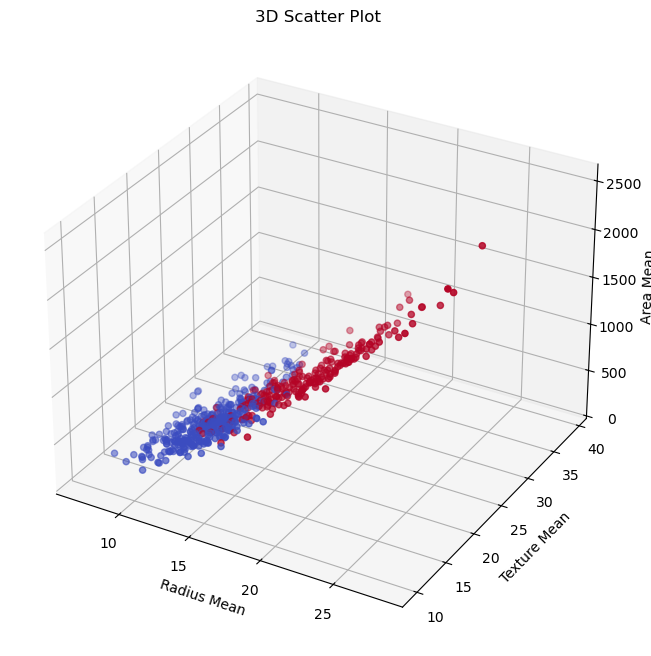

In [77]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data['radius_mean'], data['texture_mean'], data['area_mean'], c=data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0), cmap='coolwarm')
ax.set_xlabel('Radius Mean')
ax.set_ylabel('Texture Mean')
ax.set_zlabel('Area Mean')
plt.title('3D Scatter Plot')
plt.show()


### FacetGrid

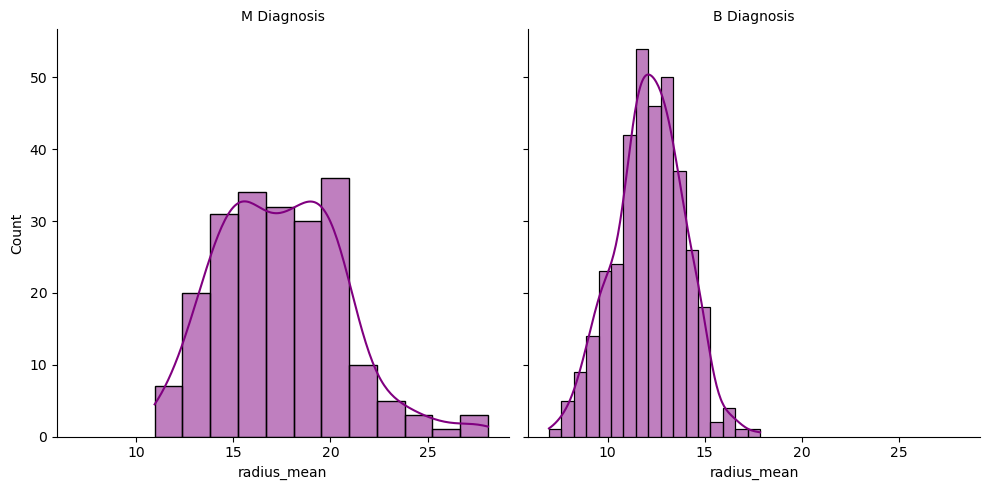

In [83]:
g = sns.FacetGrid(data, col="diagnosis", height=5, aspect=1)
g.map(sns.histplot, "radius_mean", kde=True, color="purple")
g.set_titles("{col_name} Diagnosis")
plt.show()


#### Desicion Tree

In [36]:
X = data[['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
          'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',	'smoothness_worst']]
y = data['diagnosis']

In [37]:
X

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
0,17.99,10.38,122.80,1001.0,0.11840,25.380,17.33,184.60,2019.0,0.16220
1,20.57,17.77,132.90,1326.0,0.08474,24.990,23.41,158.80,1956.0,0.12380
2,19.69,21.25,130.00,1203.0,0.10960,23.570,25.53,152.50,1709.0,0.14440
3,11.42,20.38,77.58,386.1,0.14250,14.910,26.50,98.87,567.7,0.20980
4,20.29,14.34,135.10,1297.0,0.10030,22.540,16.67,152.20,1575.0,0.13740
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,25.450,26.40,166.10,2027.0,0.14100
565,20.13,28.25,131.20,1261.0,0.09780,23.690,38.25,155.00,1731.0,0.11660
566,16.60,28.08,108.30,858.1,0.08455,18.980,34.12,126.70,1124.0,0.11390
567,20.60,29.33,140.10,1265.0,0.11780,25.740,39.42,184.60,1821.0,0.16500


In [38]:
y

0      M
1      M
2      M
3      M
4      M
      ..
564    M
565    M
566    M
567    M
568    B
Name: diagnosis, Length: 569, dtype: object

In [39]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.4, random_state=101)

In [45]:
X_train

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
411,11.04,16.83,70.92,373.2,0.10770,12.41,26.44,79.93,471.4,0.1369
220,13.65,13.16,87.88,568.9,0.09646,15.34,16.35,99.71,706.2,0.1311
15,14.54,27.54,96.73,658.8,0.11390,17.46,37.13,124.10,943.2,0.1678
198,19.18,22.49,127.50,1148.0,0.08523,23.36,32.06,166.40,1688.0,0.1322
13,15.85,23.95,103.70,782.7,0.08401,16.84,27.66,112.00,876.5,0.1131
...,...,...,...,...,...,...,...,...,...,...
552,12.77,29.43,81.35,507.9,0.08276,13.87,36.00,88.10,594.7,0.1234
393,21.61,22.28,144.40,1407.0,0.11670,26.23,28.74,172.00,2081.0,0.1502
75,16.07,19.65,104.10,817.7,0.09168,19.77,24.56,128.80,1223.0,0.1500
337,18.77,21.43,122.90,1092.0,0.09116,24.54,34.37,161.10,1873.0,0.1498


In [46]:
X_test

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst
107,12.360,18.54,79.01,466.7,0.08477,13.29,27.49,85.56,544.1,0.11840
437,14.040,15.98,89.78,611.2,0.08458,15.66,21.58,101.20,750.0,0.11950
195,12.910,16.33,82.53,516.4,0.07941,13.88,22.00,90.81,600.6,0.10970
141,16.110,18.05,105.10,813.0,0.09721,19.92,25.27,129.00,1233.0,0.13140
319,12.430,17.00,78.60,477.3,0.07557,12.90,20.21,81.76,515.9,0.08409
...,...,...,...,...,...,...,...,...,...,...
162,19.590,18.15,130.70,1214.0,0.11200,26.73,26.39,174.90,2232.0,0.14380
321,20.160,19.66,131.10,1274.0,0.08020,23.06,23.03,150.20,1657.0,0.10540
388,11.270,15.50,73.38,392.0,0.08365,12.04,18.93,79.73,450.0,0.11020
176,9.904,18.06,64.60,302.4,0.09699,11.26,24.39,73.07,390.2,0.13010


In [47]:
y_train

411    B
220    B
15     M
198    M
13     M
      ..
552    B
393    M
75     M
337    M
523    B
Name: diagnosis, Length: 341, dtype: object

In [48]:
y_test

107    B
437    B
195    B
141    M
319    B
      ..
162    M
321    M
388    B
176    B
222    B
Name: diagnosis, Length: 228, dtype: object

In [49]:
from sklearn.tree import DecisionTreeClassifier

In [50]:
data = DecisionTreeClassifier()

In [51]:
data.fit(X_train,y_train)

DecisionTreeClassifier()

In [52]:
Y_pred = data.predict(X_test)

In [53]:
import matplotlib.pyplot as plt
from sklearn import tree

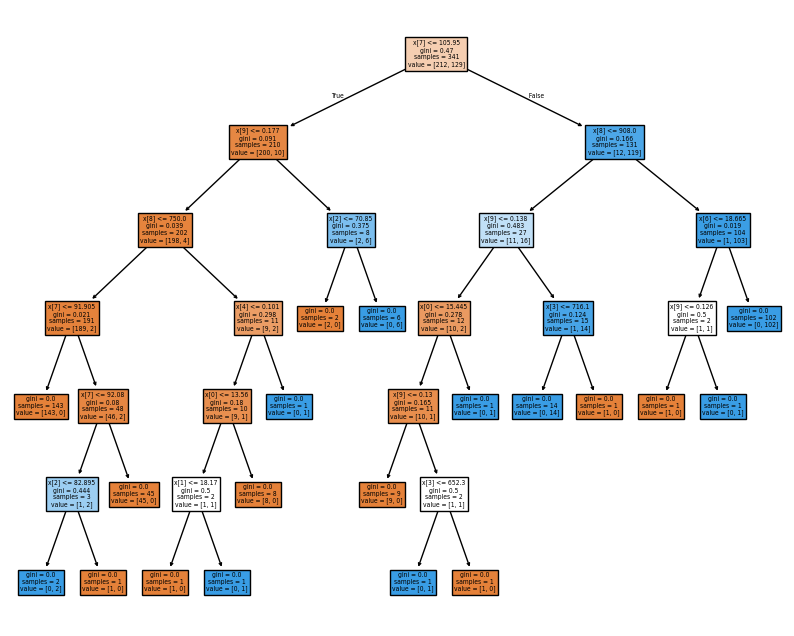

In [54]:
plt.figure(figsize=(10, 8))
tree.plot_tree(data, filled=True)
plt.show()